In [2]:
import pandas as pd
import os

In [ ]:
#sudo apt install fastqc
#sudo apt install bwa
#sudo apt install samtools

In [4]:
os.system("./script.sh")

alexandr pts/1        2025-05-28 19:28
-e -----------------------------------------------------------------------------------
-e -----------------------------------------------------------------------------------


[bwa_index] Pack FASTA... 1.26 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=129623334, availableWord=21120304
[BWTIncConstructFromPacked] 10 iterations done. 34838438 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 64359974 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 90594742 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 113908246 characters processed.
[bwt_gen] Finished constructing BWT in 48 iterations.
[bwa_index] 22.27 seconds elapse.
[bwa_index] Update BWT... 0.24 sec
[bwa_index] Pack forward-only FASTA... 1.17 sec
[bwa_index] Construct SA from BWT and Occ... 14.09 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index ./data/SRR5365416.fastq.gz
[main] Real time: 40.112 sec; CPU: 39.030 sec


-e -----------------------------------------------------------------------------------


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 2 sequences (3085740 bp)...
[M::mem_process_seqs] Processed 2 reads in 3206.960 CPU sec, 3206.974 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem ./data/SRR5365416.fastq.gz ./data/Cl_perfringens.fa
[main] Real time: 3208.452 sec; CPU: 3207.514 sec


-e -----------------------------------------------------------------------------------
-e -----------------------------------------------------------------------------------
# This file was produced by samtools stats (1.13+htslib-1.13+ds) and can be plotted using plot-bamstats
# This file contains statistics for all reads.
# The command line was:  stats ./data/file.bam
# CHK, Checksum	[2]Read Names	[3]Sequences	[4]Qualities
# CHK, CRC32 of reads which passed filtering followed by addition (32bit overflow)
CHK	0d23a4e7	853d9b21	d81fafde
# Summary Numbers. Use `grep ^SN | cut -f 2-` to extract this part.
SN	raw total sequences:	2	# excluding supplementary and secondary reads
SN	filtered sequences:	0
SN	sequences:	2
SN	is sorted:	1
SN	1st fragments:	2
SN	last fragments:	0
SN	reads mapped:	0
SN	reads mapped and paired:	0	# paired-end technology bit set + both mates mapped
SN	reads unmapped:	2
SN	reads properly paired:	0	# proper-pair bit set
SN	reads paired:	0	# paired-end technology bit s

./script.sh: 13: STAR: not found


0

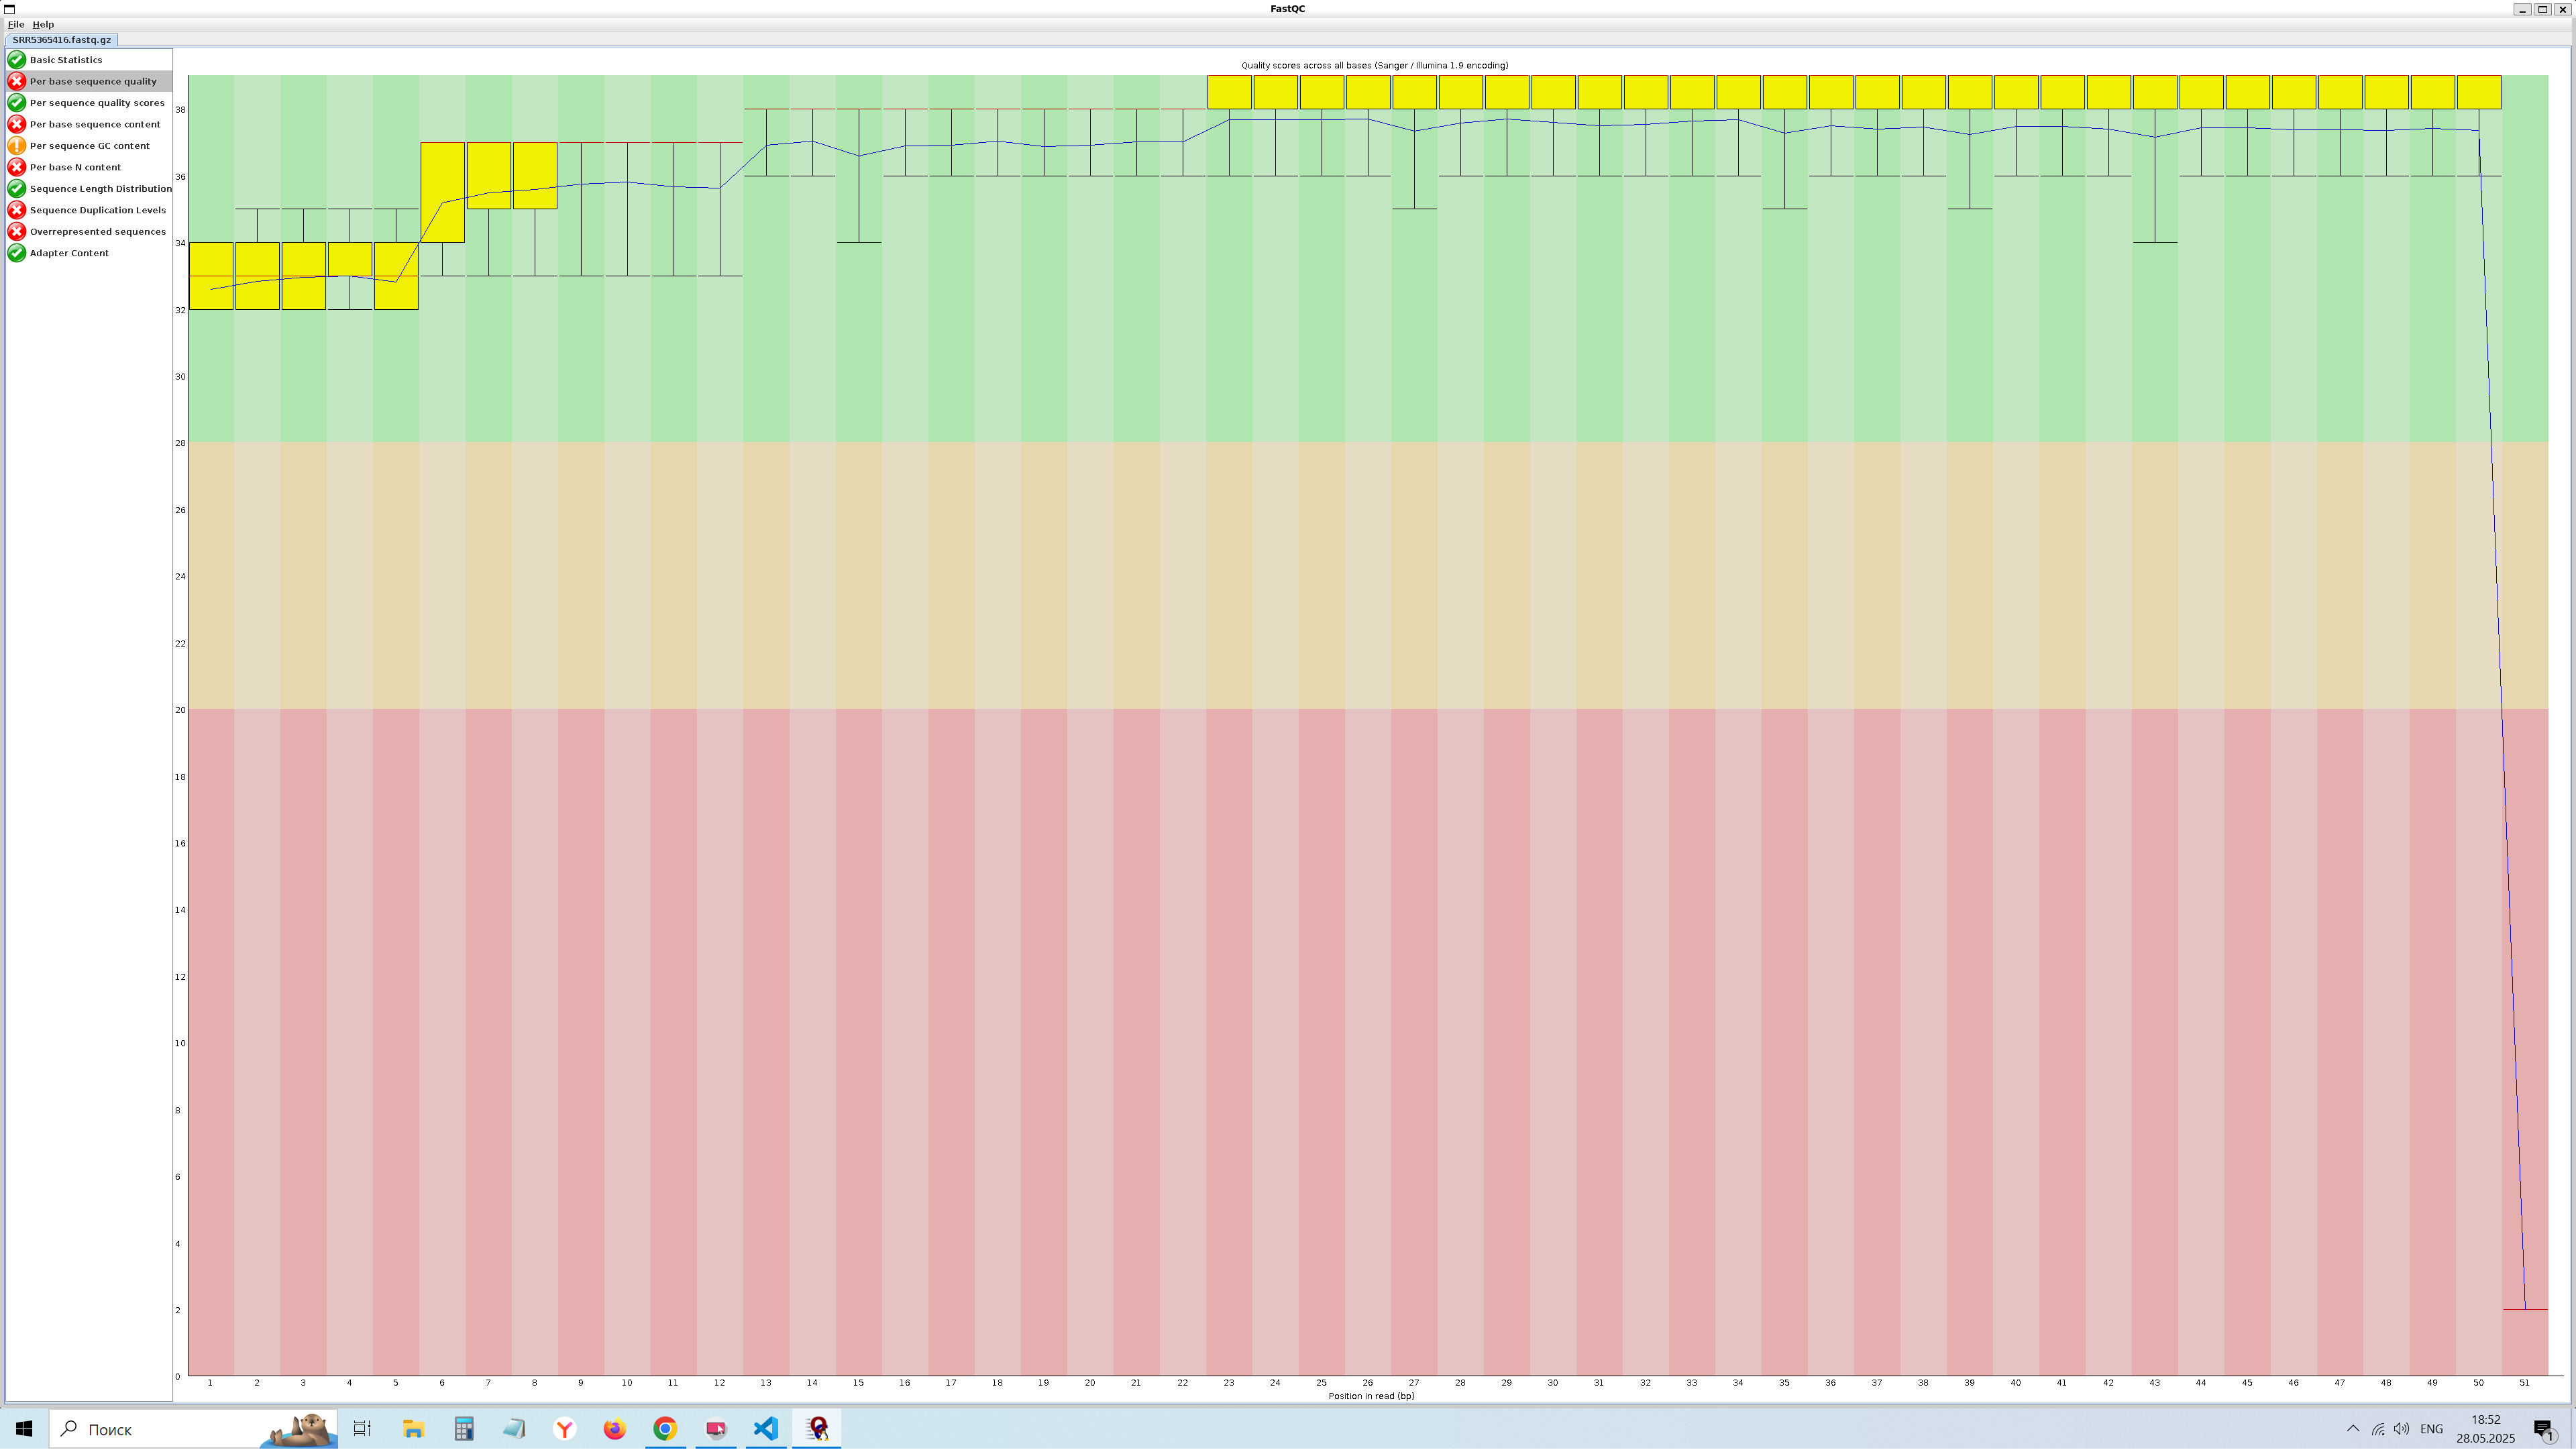

In [45]:
from IPython.display import Image
Image('data/result.png')

In [24]:
from Bio import SeqIO

records = SeqIO.parse("data/SRR5365416.fastq", "fastq")
count = SeqIO.write(records, "data/Cl_perfringens_full.fasta", "fasta")
print("Converted %i records" % count)

Converted 1270817 records


In [44]:
os.system("./script_star.sh")

-e -----------------------------------------------------------------------------------
	/home/alexandr/biostat/STAR-2.7.11b/source/STAR --runMode genomeGenerate --genomeDir ./star_genom/ --genomeFastaFiles ./data/Cl_perfringens_full.fasta --limitGenomeGenerateRAM 888365471328
	STAR version: 2.7.11b   compiled: 2025-05-28T22:08:53+03:00 :/home/alexandr/biostat/STAR-2.7.11b/source
May 28 23:08:02 ..... started STAR run
May 28 23:08:02 ... starting to generate Genome files


terminate called after throwing an instance of 'std::bad_alloc'
  what():  std::bad_alloc
Aborted


34304

нехватка памяти

In [39]:
from Bio import SeqIO

records = list(SeqIO.parse("data/Cl_perfringens.fa", "fasta"))

In [42]:
records[0].seq[:10]

Seq('TCTAAATAAG')

In [43]:
# Import pairwise2 module
from Bio import pairwise2
# Import format_alignment method
from Bio.pairwise2 import format_alignment
# Define two sequences to be aligned
X = records[0].seq[:10]
Y = records[0].seq[:5]
# Get a list of the local alignments between the two sequences ACGGGT and ACG
# No parameters. Identical characters have score of 1, else 0. # No gap penalties. 
alignments = pairwise2.align.localxx(X, Y)
# Use format_alignment method to format the alignments in the list
for a in alignments:
    print(format_alignment(*a))

1 TCTAAATAA
  ||    |||
1 TC----TAA
  Score=5

1 TCTAAATAA
  |||    ||
1 TCT----AA
  Score=5

1 TCTAAATAA
  |||  |  |
1 TCT--A--A
  Score=5

1 TCTAAATAA
  ||| |   |
1 TCT-A---A
  Score=5

1 TCTAAATAA
  ||||    |
1 TCTA----A
  Score=5

1 TCTAAATA
  |||  | |
1 TCT--A-A
  Score=5

1 TCTAAATA
  ||| |  |
1 TCT-A--A
  Score=5

1 TCTAAATA
  ||||   |
1 TCTA---A
  Score=5

1 TCTAAA
  ||| ||
1 TCT-AA
  Score=5

1 TCTAAA
  |||| |
1 TCTA-A
  Score=5

1 TCTAA
  |||||
1 TCTAA
  Score=5



In [59]:
#os.system("./script_view.sh")

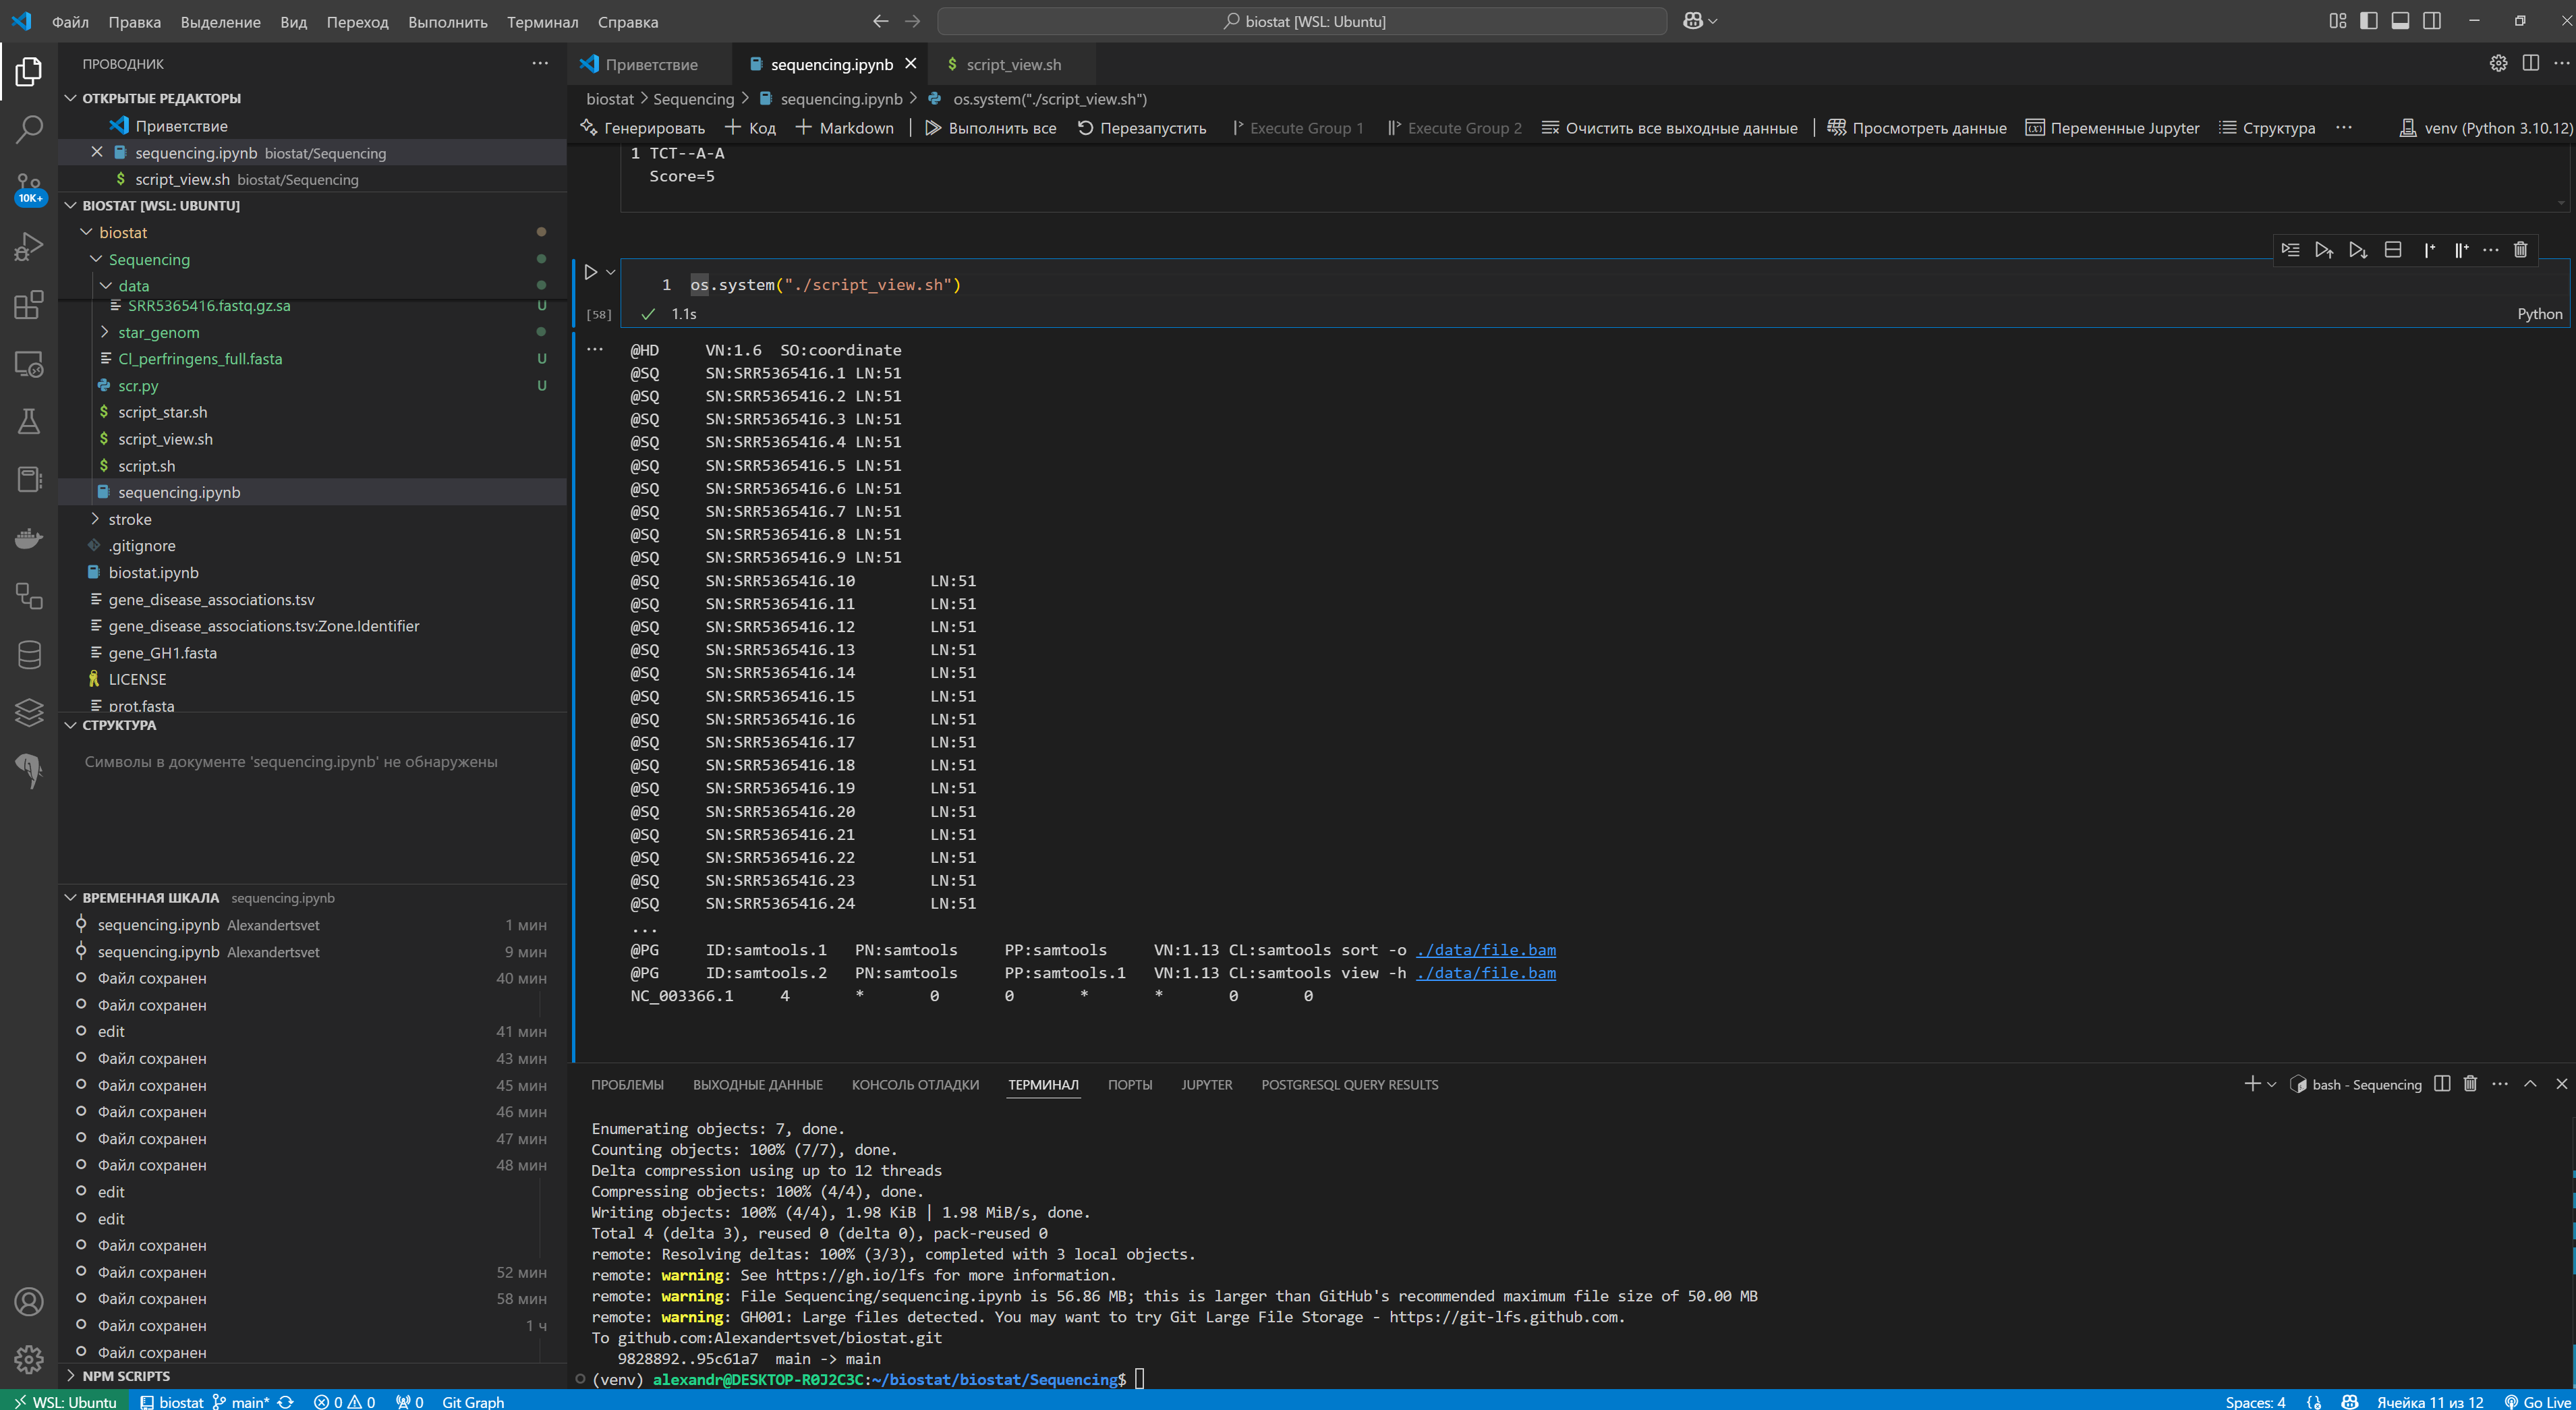

In [60]:
from IPython.display import Image
Image('data/result_.png')

    # вывод:
    * пакеты fastqc, bwa, samtools, biopython
    * проверили качество ридов;
    * проверили выравнивание ридов.
    * недостаток - использования библиотек требует большого кол-во оперативной памяти